In [1]:
import pygal
import pandas as pd

In [2]:
# using tab to auto-complete
wine_dataframe = pd.read_csv('./datasets/winequality-red.csv', sep=';')

In [3]:
wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
num_wines = len(wine_dataframe)

In [6]:
num_wines

1599

In [7]:
counts_df = wine_dataframe.groupby(['quality']).size()
counts_df

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [8]:
num_hi_qual = counts_df[7] + counts_df[8]
num_hi_qual

217

In [9]:
type(counts_df)

pandas.core.series.Series

In [10]:
num_lo_qual = counts_df[3] + counts_df[4]
num_med_qual = counts_df[5] + counts_df[6]

In [11]:
print("Total Wines: {}".format(num_wines))
print('High Quality Wines: {}'.format(num_hi_qual))
print('Medium Quality Wines: {}'.format(num_med_qual))
print('Low Quality Wines: {}'.format(num_lo_qual))

Total Wines: 1599
High Quality Wines: 217
Medium Quality Wines: 1319
Low Quality Wines: 63


In [12]:
from pygal.style import DarkStyle

In [13]:
pie_chart = pygal.Pie(width = 640, height=360, explicit_size=True, style=DarkStyle)

In [14]:
pie_chart.title = 'Wines by Quality'

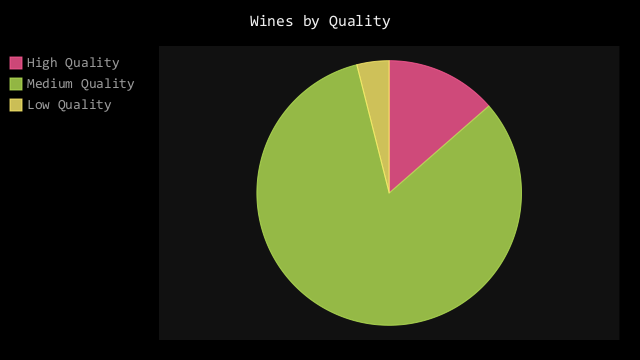

In [15]:
pie_chart.add('High Quality', num_hi_qual)
pie_chart.add('Medium Quality', num_med_qual)
pie_chart.add('Low Quality', num_lo_qual)

In [16]:
from IPython.display import display, HTML

In [17]:
html_skeleton = """
<!DOCTYPE html>
<html>
    <head>
    <script type="text/javascript"
            src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js">
    </script>
    <script type="text/javascript"
            src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js">
    </script>
    <head>
        <body>
            <figure>
                {rendered_chart}
            </figure>
        </body>
    </head>
</html>
"""

In [19]:
def display_chart(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = html_skeleton.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

In [20]:
display_chart(pie_chart)

In [22]:
# create a donut chart
pie_chart = pygal.Pie(width=640, height=360, explicit_size=True, sytle=DarkStyle, inner_radius = 0.5)

In [24]:
pie_chart.title = 'Wines by Quality'
pie_chart.add('High Quality', num_hi_qual)
pie_chart.add('Medium Quality', num_med_qual)
pie_chart.add('Low Quality', num_lo_qual)

display_chart(pie_chart)

In [28]:
# create half pie
pie_chart = pygal.Pie(width=640, height=360, explict_size=True, style=DarkStyle, half_pie=True, inner_radius=0.5)

In [29]:
pie_chart.title = "Wines by Quality"
pie_chart.add('High Quality', num_hi_qual)
pie_chart.add('Medium Quality', num_med_qual)
pie_chart.add('Low Quality', num_lo_qual)

display_chart(pie_chart)

In [30]:
pie_chart2 = pygal.Pie(width=640, height= 360, explicit_size = True, style=DarkStyle)
pie_chart2.title = "Wines by Quality"

In [33]:
pie_chart2.add('Low Quality', [counts_df[3], counts_df[4]])
pie_chart2.add('Medium Quality', [counts_df[5], counts_df[6]])
pie_chart2.add('High Quality', [counts_df[7], counts_df[8]])
display_chart(pie_chart2)

In [35]:
pie_chart2.add('Low Quality', [{'value': counts_df[3], 'label': '3'}, {'value': counts_df[4], 'label':'4'}])
pie_chart2.add('Medium Quality', [{'value': counts_df[5], 'label':'5'}, {'value':counts_df[6], 'label':'6'}])
pie_chart2.add('High Quality', [{'value':counts_df[7], 'label': '7'}, {'value':counts_df[8], 'lable':'8'}])
display_chart(pie_chart2)

In [36]:
# question - how to clear the label and re-display